In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(25)

C:\Users\okial\AppData\Local\Temp\ipykernel_15412\797276312.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("../Dataset/sleep_dataset_enhanced.xlsx")
df.head()

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,15.3,NaN,NaN,2.0,23.0,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,11.0,25.0,5.0,2.0,3.0


**Exploratory Data Analysis**

In [3]:
df.shape

(87, 17)

In [4]:
df.describe()
# BrainWt = 0 considered as missing values

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,87.000000,87.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,17.275862,129.362069,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.787590,137.010772,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,11.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,3.700000,30.000000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,12.000000,68.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,24.500000,180.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [5]:
df.isna().sum()
# Many columns with missing values

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

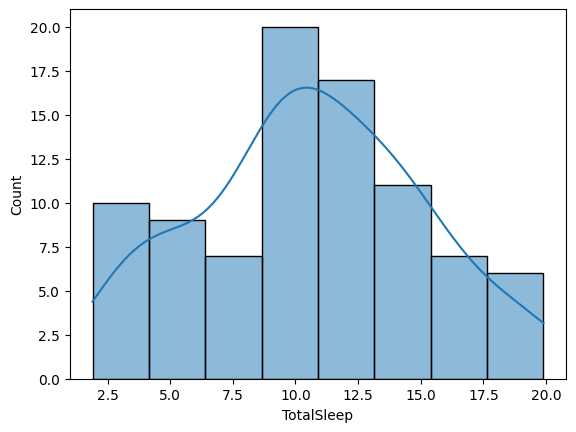

In [6]:
sns.histplot(df['TotalSleep'], kde=True)
plt.show()

<Axes: ylabel='BodyWt'>

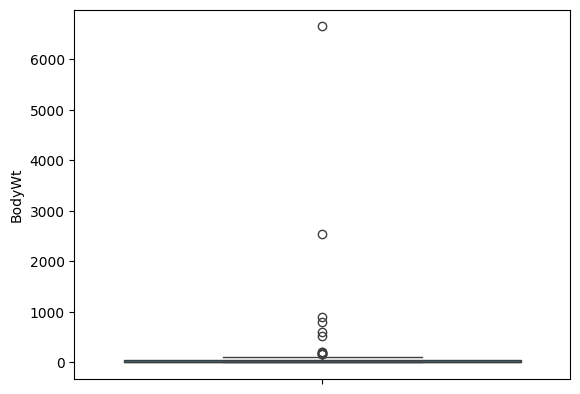

In [7]:
sns.boxplot(df.BodyWt)

# Highly asymmetrical distribution - Use of a logarithm transformation ?

<Axes: ylabel='BodyWt'>

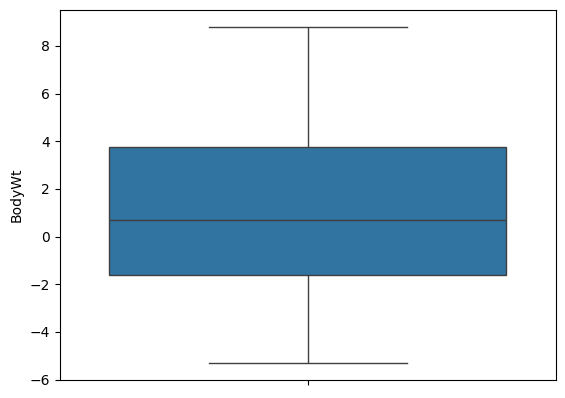

In [8]:
sns.boxplot(np.log(df.BodyWt))
# more usable with a logarithm scale

In [9]:
len(df.loc[df.BrainWt == 0])
# 23 rows with null values
# They are missing values to be replaced

23

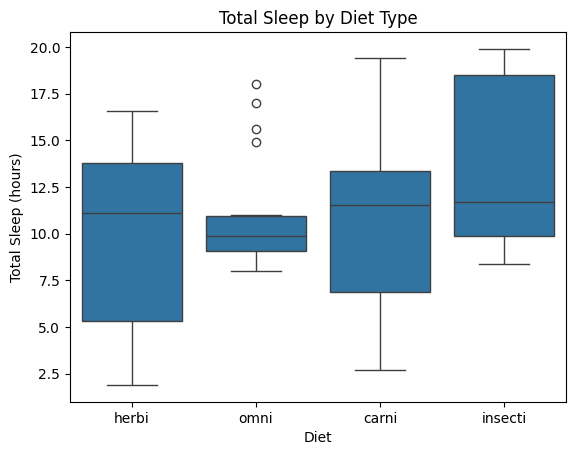

In [10]:
sns.boxplot(x='Vore', y='TotalSleep', data=df)
plt.xlabel('Diet')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep by Diet Type')
plt.show()

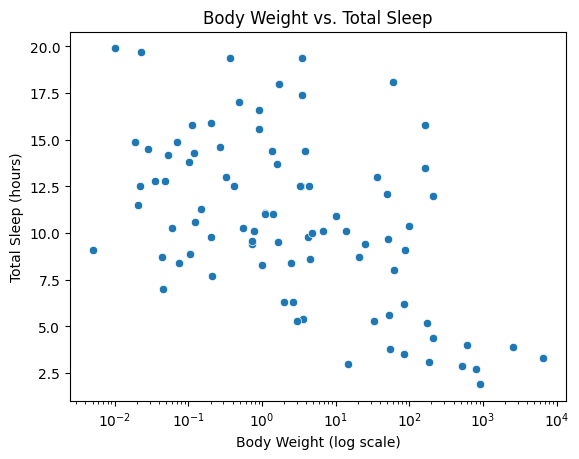

In [11]:
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df)
plt.xscale('log')  # Using log scale because BodyWt varies widely
plt.xlabel('Body Weight (log scale)')
plt.ylabel('Total Sleep (hours)')
plt.title('Body Weight vs. Total Sleep')
plt.show()

<Axes: xlabel='LifeSpan', ylabel='Count'>

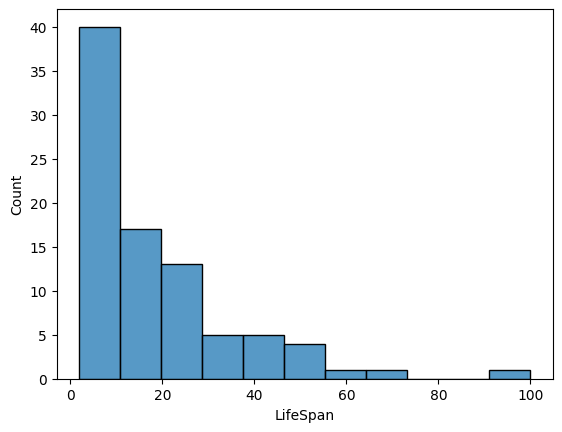

In [12]:
sns.histplot(df,x="LifeSpan")

In [13]:
df.loc[df.LifeSpan > 60]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
5,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0
41,Human,Homo,Primates,Hominidae,omni,lc,62.0,1320.0,8.0,16.0,6.1,1.9,100.0,267.0,1.0,1.0,1.0


<Axes: xlabel='Gestation', ylabel='Count'>

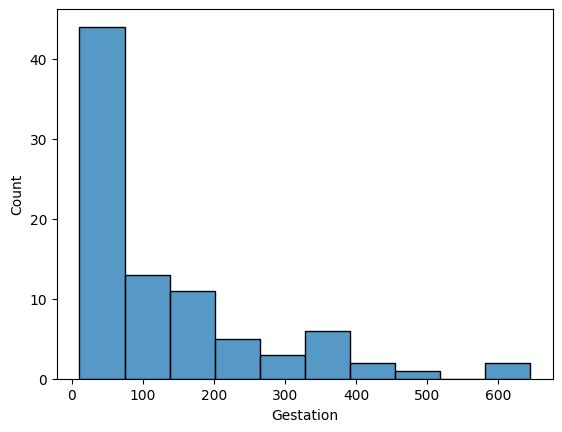

In [14]:
sns.histplot(df,x="Gestation")

# Gestation and LifeSpan with asymmetrical distributions. We should use the logarithm transformation.

In [15]:
df.loc[df.Danger.isna(),['Predation','Exposure','Danger']]
# Values missing for the same rows in the dataset

,Predation,Exposure,Danger
2,NaN,NaN,NaN
8,NaN,NaN,NaN
10,NaN,NaN,NaN
11,NaN,NaN,NaN
14,NaN,NaN,NaN
15,NaN,NaN,NaN
17,NaN,NaN,NaN
18,NaN,NaN,NaN
20,NaN,NaN,NaN
23,NaN,NaN,NaN


Text(0.5, 1.0, 'Total Sleep vs. Gestation Period')

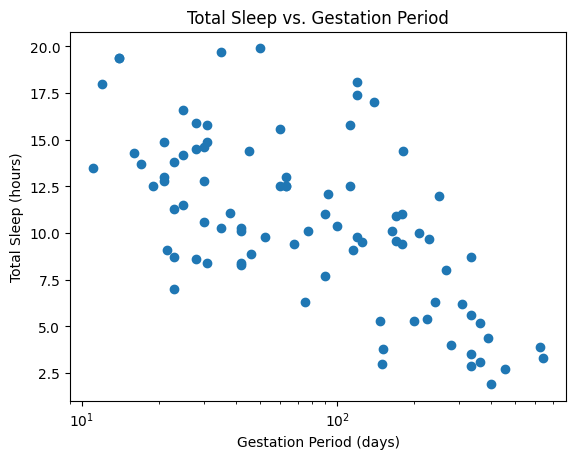

In [16]:
plt.scatter(df['Gestation'], df['TotalSleep'])
plt.xlabel('Gestation Period (days)')
plt.xscale('log')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep vs. Gestation Period')

Text(0, 0.5, 'Total Sleep')

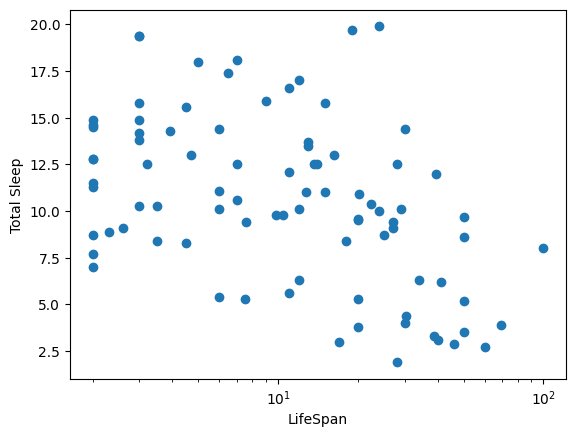

In [17]:
plt.scatter(df['LifeSpan'], df['TotalSleep'])
plt.xlabel('LifeSpan')
plt.xscale('log')
plt.ylabel('Total Sleep')

<Axes: xlabel='Danger', ylabel='Count'>

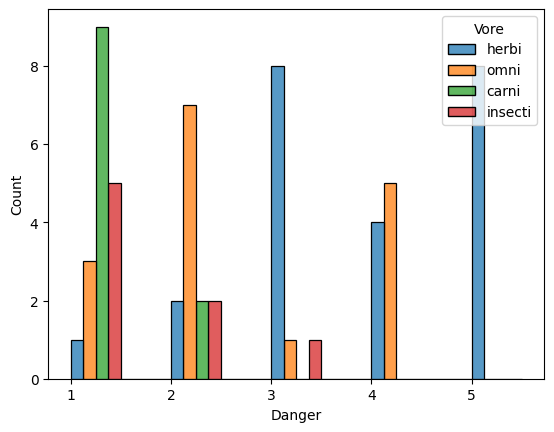

In [18]:
sns.histplot(data=df, x="Danger", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Exposure', ylabel='Count'>

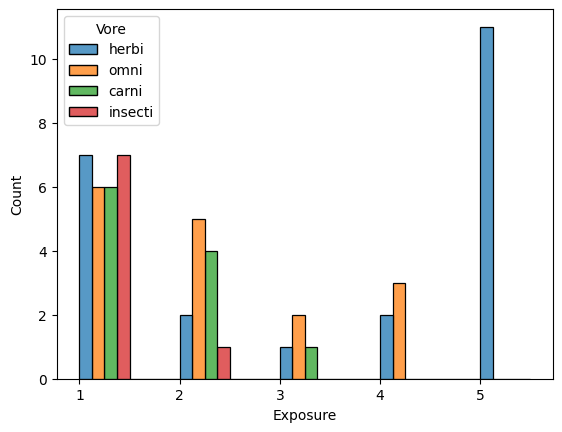

In [19]:
sns.histplot(data=df, x="Exposure", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Predation', ylabel='Count'>

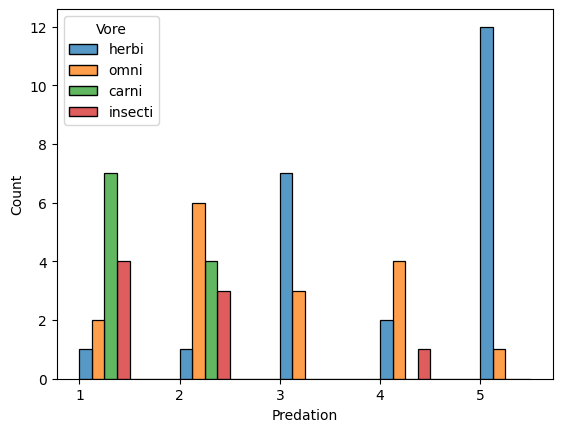

In [20]:
sns.histplot(data=df, x="Predation", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='TotalSleep', ylabel='Dreaming'>

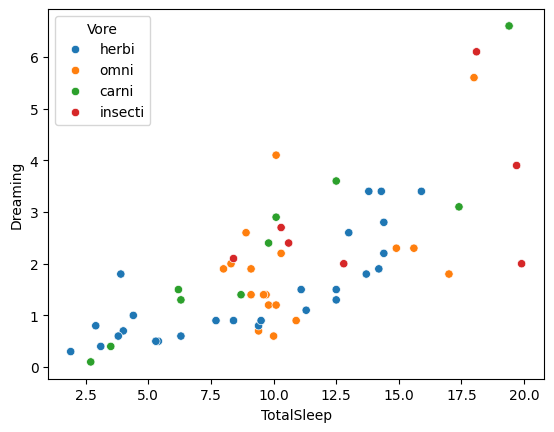

In [21]:
sns.scatterplot(df,x="TotalSleep",y="Dreaming",hue="Vore")

In [22]:
df.Vore.value_counts()

Vore
herbi      37
carni      22
omni       20
insecti     8
Name: count, dtype: int64

In [23]:
df.Family.value_counts()

# Too much categories

Family
Cricetidae          7
Sciuridae           5
Felidae             5
Muridae             4
Canidae             4
Cercopithecidae     4
Bovidae             3
Didelphidae         3
Soricidae           3
Procaviidae         3
Hominidae           3
Lorisidae           2
Talpidae            2
Equidae             2
Erinaceidae         2
Elephantidae        2
Phocidae            2
Delphinidae         2
Vespertilionidae    2
Tachyglossidae      1
Cebidae             1
Tenrecidae          1
Cervidae            1
Procyonidae         1
Leporidae           1
Bradypodidae        1
Potoroidae          1
Suidae              1
Phalangeridae       1
Aotidae             1
Otariidae           1
Giraffidae          1
Aplodontia          1
Lemuridae           1
Spalacidae          1
Dasypodidae         1
Caviidae            1
Nesomyidae          1
Chlamyphoridae      1
Viverridae          1
Galagidae           1
Octodontidae        1
Phocoena            1
Chinchillidae       1
Tapiridae           1
Tup

In [24]:
df.Genus.value_counts()

# Too much categories

Genus
Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: count, Length: 80, dtype: int64

In [25]:
df.Order.value_counts()

# Too much categories

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: count, dtype: int64

In [26]:
df.Conservation.value_counts()

Conservation
lc              50
domesticated    10
vu               9
en               8
nt               7
cd               2
cr               1
Name: count, dtype: int64

<Axes: >

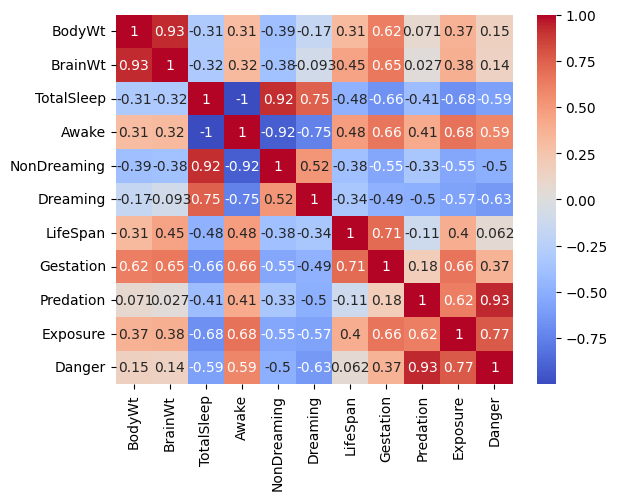

In [27]:
sns.heatmap(df[["BodyWt","BrainWt","TotalSleep",'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger']].corr(),annot=True,cmap='coolwarm')

c:\Users\okial\Documents\DSTI\ML Project\ML-Project\sleepML\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

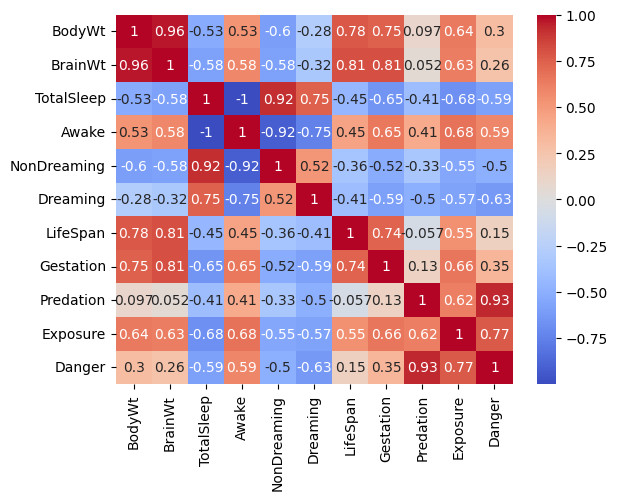

In [28]:
# Impact of the change in log on the correlation
df_log = df.copy()
df_log.Gestation = np.log(df_log.Gestation)
df_log.LifeSpan = np.log(df_log.LifeSpan)
df_log.BodyWt = np.log(df_log.BodyWt)
df_log.BrainWt = np.log(df_log.BrainWt)
sns.heatmap(df_log[["BodyWt","BrainWt","TotalSleep",'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger']].corr(),annot=True,cmap='coolwarm')

**Feature Engineering**

In [29]:
# Copy the dataset in the case something goes wrong when modifying
df_processed = df.copy() 

In [30]:
# Possibility to compute the Dreaming missing values ? No
df_processed.loc[df_processed.Dreaming.isna(),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
0,3.3,NaN,NaN
2,8.7,NaN,NaN
3,12.5,NaN,NaN
4,16.6,NaN,NaN
8,5.2,NaN,NaN
11,12.1,NaN,NaN
14,5.6,NaN,NaN
17,11.5,NaN,NaN
23,15.8,NaN,NaN
33,12.0,NaN,NaN


In [31]:
# Replacing the BrainWt null values
df_non_missing_BrainWt = df_processed.loc[df_processed.BrainWt > 0]

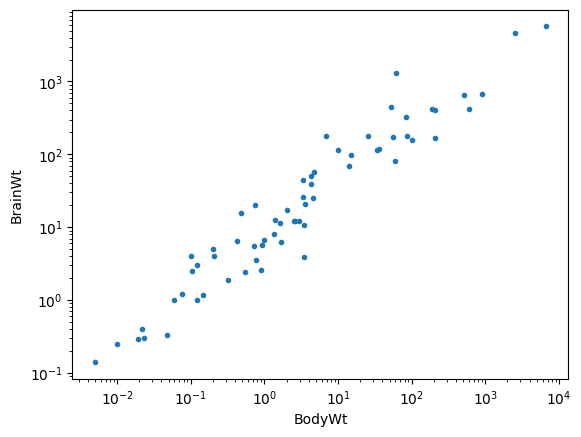

In [32]:
plt.plot(df_non_missing_BrainWt.BodyWt,df_non_missing_BrainWt.BrainWt,'.')
plt.yscale('log')
plt.ylabel('BrainWt')
plt.xscale('log')
plt.xlabel('BodyWt')
plt.show()

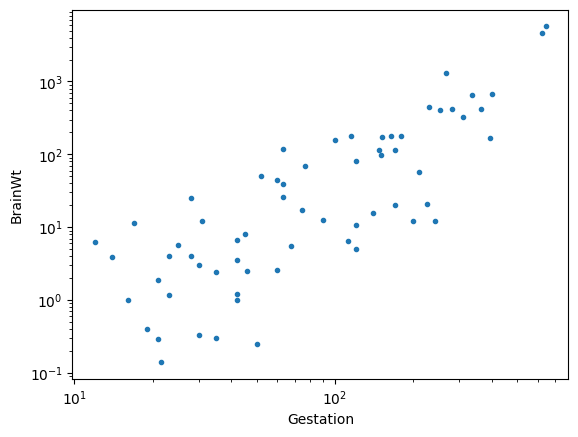

In [33]:
plt.plot(df_non_missing_BrainWt.Gestation,df_non_missing_BrainWt.BrainWt,'.')
plt.yscale('log')
plt.ylabel('BrainWt')
plt.xscale('log')
plt.xlabel('Gestation')
plt.show()

In [34]:
# Using a regresssion line to fill the missing values
from sklearn.linear_model import LinearRegression

# Data used to draw the regression line
train_data = np.log(df_non_missing_BrainWt[['BrainWt','BodyWt','Gestation','LifeSpan']])

linreg = LinearRegression()

# Independant variables
train_data_x = train_data[['BodyWt','Gestation','LifeSpan']]
# Dependant variable
train_data_y = train_data['BrainWt']

#training the model
linreg.fit(train_data_x,train_data_y)

# Add a column in the dataset with the computed values
df_processed['BrainWt_computed'] = linreg.predict(np.log(df_processed[['BodyWt','Gestation','LifeSpan']]))

In [35]:
# Computing the log for BodyWt, Gestation and LifeSpan in the original dataset
df_processed['BodyWt'] = np.log(df_processed['BodyWt'])
df_processed['Gestation'] = np.log(df_processed['Gestation'])
df_processed['LifeSpan'] = np.log(df_processed['LifeSpan'])

# Computing the log for the non zeros values in BrainWt
df_processed.loc[df_processed.BrainWt!=0,'BrainWt'] = np.log(df_processed.loc[df_processed.BrainWt!=0,'BrainWt'])

# Replace the zeros with the computed values
df_processed.loc[df_processed.BrainWt==0,'BrainWt'] = df_processed.loc[df_processed.BrainWt == 0,'BrainWt_computed']

# Delete the column of the computed BrainWt
df_processed.drop(columns= 'BrainWt_computed' ,inplace = True)

# Verify the result
len(df_processed.loc[df_processed.BrainWt == 0])

0

In [36]:
# Using the median to fill the missing values of Predation, Exposure and Danger

# Dictionnary with the values to fill
median_attributes = df[['Vore','Predation','Exposure','Danger']].groupby(['Vore']).median().astype(int).to_dict('split')

# Temporary dataframe with the missing values
temp_df = df.loc[df.Predation.isna()]


i = 0
for vore in median_attributes['index']:
    # Replace the NaN with the values in the dictionnary for each vore
    temp_df.loc[temp_df.Vore == vore,['Predation','Exposure','Danger']] = median_attributes['data'][i]
    i += 1

# Replace the values in the original dataset
df_processed.loc[df_processed.Predation.isna(),['Predation','Exposure','Danger']] = temp_df[['Predation','Exposure','Danger']]

# Verify the result
df_processed.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [37]:
# get dummies to transform the categorical column Vore in numerical
df_processed[['herbi','insecti','omni']] = pd.get_dummies(df_processed.Vore, drop_first=True, dtype=np.uint8)

# Verify the result
df_processed[['Vore','herbi','insecti','omni']].head(10)

,Vore,herbi,insecti,omni
0,herbi,1,0,0
1,omni,0,0,1
2,omni,0,0,1
3,carni,0,0,0
4,herbi,1,0,0
5,herbi,1,0,0
6,omni,0,0,1
7,insecti,0,1,0
8,carni,0,0,0
9,herbi,1,0,0


In [38]:
#'cd' category, once indicating species needing conservation to avoid higher risk,
# is no longer used by the IUCN. Its ambiguous status, suggesting risk but less than Vulnerable, 
#allows for flexible placement in encoding, possibly near Near Threatened or as 3

conservation_mapping = {
    'domesticated': 1,
    'lc': 2,
    'nt': 3,
    'cd': 3,  # or another value, depending on how you decide to treat it
    'vu': 4,
    'en': 5,
    'cr': 6
}

df_processed['Conservation_encoded'] = df_processed['Conservation'].map(conservation_mapping)

df_processed[['Conservation','Conservation_encoded']].head(10)

,Conservation,Conservation_encoded
0,vu,4
1,lc,2
2,lc,2
3,lc,2
4,lc,2
5,en,5
6,lc,2
7,lc,2
8,lc,2
9,vu,4


In [39]:
# Correlation between 'Danger' and 'Predation'
df['Danger'].corr(df['Predation'])

0.930782295215481

In [40]:
# Delete all the other unusable columns
# Awake and NonDreaming redundant with TotalSleep and Dreaming

df_processed.drop(columns=['Species','Genus','Family','Order','Vore','Conservation','Predation','Awake','NonDreaming'],inplace=True)

In [41]:
df_processed.isna().sum()

BodyWt                   0
BrainWt                  0
TotalSleep               0
Dreaming                24
LifeSpan                 0
Gestation                0
Exposure                 0
Danger                   0
herbi                    0
insecti                  0
omni                     0
Conservation_encoded     0
dtype: int64

**Model Training and Evaluation**

In [42]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_processed,test_size = 0.25)

In [43]:
# TotalSleep regression model

TotalSleep_linreg = LinearRegression()

# train data 
X_train = df_train[['BodyWt','BrainWt','LifeSpan','Gestation',
       'Danger','Exposure','Conservation_encoded','herbi',
       'insecti','omni']].values
y_train = df_train['TotalSleep'].values

# test data 
X_test = df_test[['BodyWt','BrainWt','LifeSpan','Gestation',
       'Danger','Exposure','Conservation_encoded','herbi',
       'insecti', 'omni']].values
# Dependant variable
y_test = df_test['TotalSleep'].values

#training the model
TotalSleep_linreg.fit(X_train,y_train)

# Predicting Totalsleep with the model
y_test_predicted = TotalSleep_linreg.predict(X_test)

In [44]:

# Results of the regression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error


TotalSleep_MAPE = mean_absolute_percentage_error(y_test,y_test_predicted)
TotalSleep_RMSE = root_mean_squared_error(y_test,y_test_predicted)

In [45]:
print('TotalSleep_MAPE:',TotalSleep_MAPE,'  TotalSleep_RMSE',TotalSleep_RMSE)

TotalSleep_MAPE: 0.27214082306471776   TotalSleep_RMSE 2.8297572951824037


In [46]:
# Add the predicted values of TotalSleep in the dataframe
# We will use them to predict Dreaming

df_processed['TotalSleep_predicted'] = TotalSleep_linreg.predict(df_processed[['BodyWt','BrainWt','LifeSpan','Gestation',
       'Danger','Exposure','Conservation_encoded','herbi',
       'insecti', 'omni']].values)

In [47]:
# Dreaming regression model

Dreaming_linreg = LinearRegression()

# Remove the missing values
df_train, df_test = train_test_split(df_processed[~df_processed['Dreaming'].isna()], test_size = 0.25)

# train data 
X_train = df_train[['BodyWt','BrainWt','LifeSpan','Gestation',
       'Danger','Exposure','TotalSleep_predicted','Conservation_encoded','herbi',
       'insecti','omni']].values
y_train = df_train['Dreaming'].values

# test data 
X_test = df_test[['BodyWt','BrainWt','LifeSpan','Gestation',
       'Danger','Exposure','TotalSleep_predicted','Conservation_encoded','herbi',
       'insecti','omni']].values
# Dependant variable
y_test = df_test['Dreaming'].values

#training the model
Dreaming_linreg.fit(X_train,y_train)

# Predicting Totalsleep with the model
y_test_predicted = Dreaming_linreg.predict(X_test)


In [48]:
# Results of the regression

Dreaming_MAPE = mean_absolute_percentage_error(y_test,y_test_predicted)
Dreaming_RMSE = root_mean_squared_error(y_test,y_test_predicted)

In [49]:
print('Dreaming_MAPE:',Dreaming_MAPE,'  Dreaming_RMSE',Dreaming_RMSE)

Dreaming_MAPE: 0.4996661854788868   Dreaming_RMSE 0.9043645011753239


In [50]:
# Add the predicted values of Dreaming in the dataframe

df_processed['Dreaming_predicted'] = Dreaming_linreg.predict(df_processed[['BodyWt','BrainWt','LifeSpan','Gestation',
       'Danger','Exposure','TotalSleep_predicted','Conservation_encoded','herbi',
       'insecti','omni']].values)

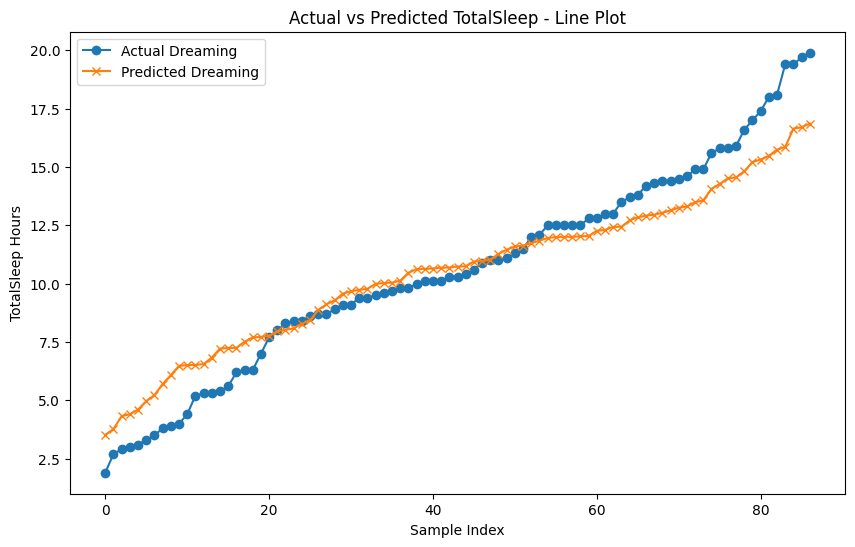

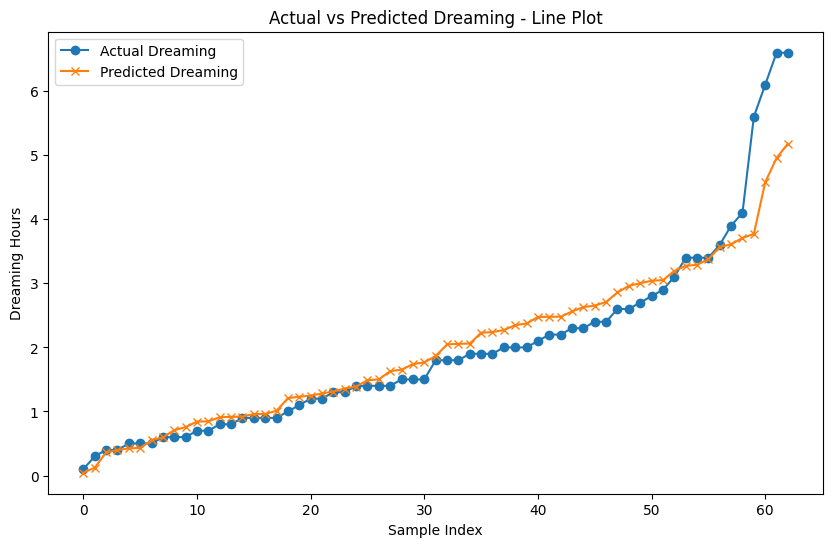

In [51]:
# Plotting Actual vs Predicted for TotalSleep with line plot

actual_TotalSleep_sorted = df_processed['TotalSleep'].sort_values()
predicted_TotalSleep_sorted = df_processed['TotalSleep_predicted'].sort_values()

plt.figure(figsize=(10, 6))
plt.plot(actual_TotalSleep_sorted.values, label='Actual Dreaming', marker='o')
plt.plot(predicted_TotalSleep_sorted.values, label='Predicted Dreaming', marker='x')
plt.title('Actual vs Predicted TotalSleep - Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('TotalSleep Hours')
plt.legend()
plt.show()

# Plotting Actual vs Predicted for Dreaming with line plot

df_Dreaming_non_missing = df_processed[~df_processed['Dreaming'].isna()]
actual_Dreaming_sorted = df_Dreaming_non_missing['Dreaming'].sort_values()
predicted_Dreaming_sorted = df_Dreaming_non_missing['Dreaming_predicted'].sort_values()

plt.figure(figsize=(10, 6))
plt.plot(actual_Dreaming_sorted.values, label='Actual Dreaming', marker='o')
plt.plot(predicted_Dreaming_sorted.values, label='Predicted Dreaming', marker='x')
plt.title('Actual vs Predicted Dreaming - Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Dreaming Hours')
plt.legend()
plt.show()